In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from ggplot import *
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline

/Users/apple/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/apple/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/apple/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [77]:
google = pd.read_csv('GOOGL_2018.csv')
amazon = pd.read_csv('AMZN_2018.csv')
IBM = pd.read_csv('IBM_2018.csv')
cissco = pd.read_csv('CSCO_2018.csv')

#### (1) Time series plotting for yearly volume of Google

In [78]:
google['Date'] = pd.to_datetime(google['Date'])
google = google.set_index('Date')
google.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
2006-01-10,232.44,235.36,231.25,235.11,9104719,GOOGL
2006-01-11,235.87,237.79,234.82,236.05,9008664,GOOGL
2006-01-12,237.10,237.73,230.98,232.05,10125212,GOOGL
2006-01-13,232.39,233.68,231.04,233.36,7660220,GOOGL


In [79]:
google = google.groupby(google.index.year).sum()

In [80]:
google = google.reset_index('Date')

Text(0.5,1,'Yearly Volume')

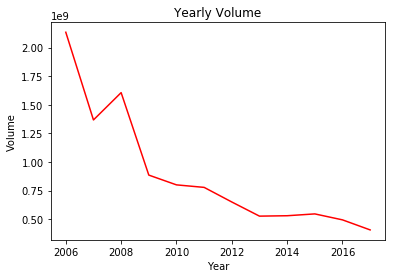

In [81]:
plt.plot(google.Date, google.Volume, 'r')
plt.xlabel(r'Year')
plt.ylabel(r'Volume')
plt.title(r'Yearly Volume')

#### (2) Explore relationship between open and volume for Google of 2017

In [82]:
google = pd.read_csv('GOOGL_2018.csv')
google = google[google['Date'] > '2017-01-01']

Text(0.5,1,'Relationship between Open and Volume')

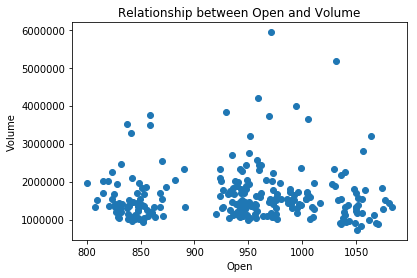

In [83]:
plt.scatter(google.Open, google.Volume)
plt.xlabel(r'Open')
plt.ylabel(r'Volume')
plt.title(r'Relationship between Open and Volume')

#### (3) Compare yearly volume between google, amazon, IBM and Cissco

In [84]:
google = pd.read_csv('GOOGL_2018.csv')
amazon = pd.read_csv('AMZN_2018.csv')
IBM = pd.read_csv('IBM_2018.csv')
cissco = pd.read_csv('CSCO_2018.csv')

In [85]:
google['Date'] = pd.to_datetime(google['Date'])
google = google.set_index('Date')
google = google.groupby(google.index.year).sum()
google = google.reset_index('Date')

In [86]:
amazon['Date'] = pd.to_datetime(amazon['Date'])
amazon = amazon.set_index('Date')
amazon = amazon.groupby(amazon.index.year).sum()
amazon = amazon.reset_index('Date')

In [87]:
IBM['Date'] = pd.to_datetime(IBM['Date'])
IBM = IBM.set_index('Date')
IBM = IBM.groupby(IBM.index.year).sum()
IBM = IBM.reset_index('Date')

In [88]:
cissco['Date'] = pd.to_datetime(cissco['Date'])
cissco = cissco.set_index('Date')
cissco = cissco.groupby(cissco.index.year).sum()
cissco = cissco.reset_index('Date')

Text(0.5,1,'Cissco')

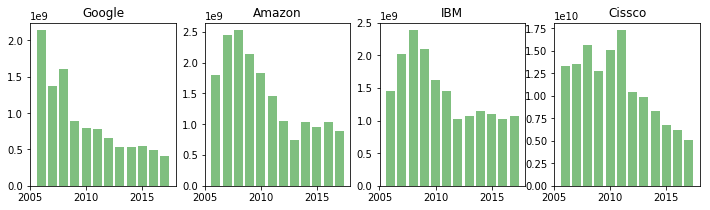

In [89]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))
axes[0].bar(google.Date, google.Volume, color='g', alpha=0.5)
axes[0].set_title(r'Google')

axes[1].bar(amazon.Date, amazon.Volume, color='g', alpha=0.5)
axes[1].set_title(r'Amazon')

axes[2].bar(IBM.Date, IBM.Volume, color='g', alpha=0.5 )
axes[2].set_title(r'IBM')

axes[3].bar(cissco.Date, cissco.Volume, color='g', alpha=0.5)
axes[3].set_title(r'Cissco')

#### (4) Explore relationships across the entire data set of google

In [90]:
google = pd.read_csv('GOOGL_2018.csv')

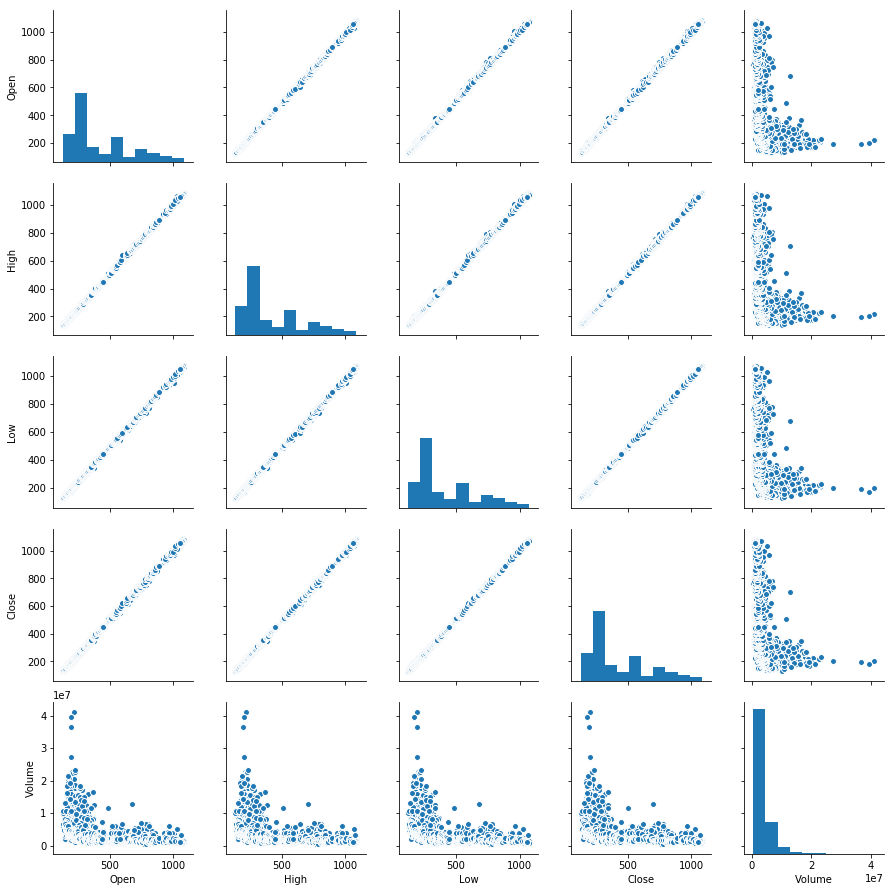

In [91]:
sns.pairplot(google)

#### (5) Comepare volumes among the companies using box plotting

In [92]:
google = pd.read_csv('GOOGL_2018.csv')
amazon = pd.read_csv('AMZN_2018.csv')
IBM = pd.read_csv('IBM_2018.csv')
cissco = pd.read_csv('CSCO_2018.csv')

In [93]:
google['Date'] = pd.to_datetime(google['Date'])
google = google.set_index('Date')
google = google.groupby(google.index.year).sum()
google = google.reset_index('Date')
amazon['Date'] = pd.to_datetime(amazon['Date'])
amazon = amazon.set_index('Date')
amazon = amazon.groupby(amazon.index.year).sum()
amazon = amazon.reset_index('Date')
IBM['Date'] = pd.to_datetime(IBM['Date'])
IBM = IBM.set_index('Date')
IBM = IBM.groupby(IBM.index.year).sum()
IBM = IBM.reset_index('Date')
cissco['Date'] = pd.to_datetime(cissco['Date'])
cissco = cissco.set_index('Date')
cissco = cissco.groupby(cissco.index.year).sum()
cissco = cissco.reset_index('Date')

In [94]:
df = pd.DataFrame({'google': google.Volume,'amazon': amazon.Volume,'IBM': IBM.Volume, 'cissco': cissco.Volume}) 
df

,IBM,amazon,cissco,google
0,1456969900,1792552278,13258129402,2134134420
1,2020809341,2454647696,13535023012,1367346735
2,2379070365,2520431923,15584844309,1606159196
3,2092138944,2146562394,12709721587,885224033
4,1619022590,1829323102,15060642730,799731223
5,1451297403,1464295930,17239080466,777725691
6,1020874087,1050233531,10439006668,649998834
7,1069999353,748378451,9857700272,526336666
8,1140046829,1030226257,8276683283,529858529
9,1100959104,954245799,6796771636,545842483


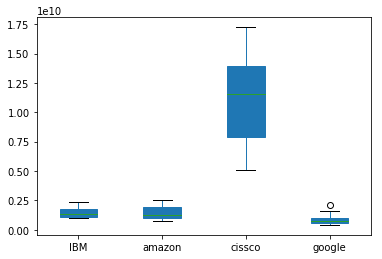

In [95]:
df.plot(kind='box', patch_artist=True)

#### (6) Compare open prices among the companies using category plotting

In [96]:
google = pd.read_csv('GOOGL_2018.csv')
amazon = pd.read_csv('AMZN_2018.csv')
IBM = pd.read_csv('IBM_2018.csv')
cissco = pd.read_csv('CSCO_2018.csv')

In [97]:
google['Date'] = pd.to_datetime(google['Date'])
google = google.set_index('Date')

In [98]:
amazon['Date'] = pd.to_datetime(amazon['Date'])
amazon = amazon.set_index('Date')

In [99]:
IBM['Date'] = pd.to_datetime(IBM['Date'])
IBM = IBM.set_index('Date')

In [100]:
cissco['Date'] = pd.to_datetime(cissco['Date'])
cissco = cissco.set_index('Date')

In [101]:
total_data = pd.concat([google,amazon,IBM,cissco],axis=0)

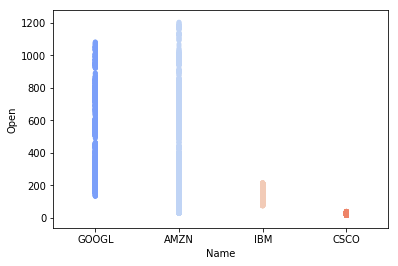

In [102]:
sns.stripplot(x=r'Name',y=r'Open',data=total_data, palette="coolwarm")

#### (7) Explore relationship between open and close using JointGrid

In [103]:
google = pd.read_csv('GOOGL_2018.csv')

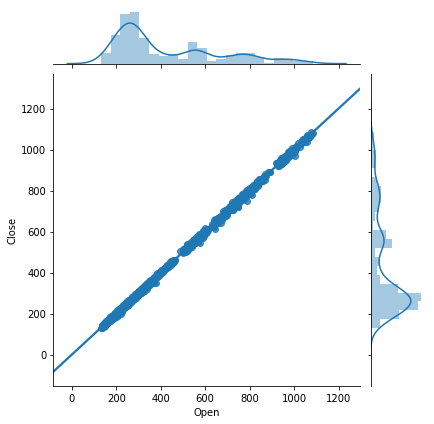

In [104]:
g = sns.JointGrid(x=r"Open", y=r"Close", data=google)
g = g.plot(sns.regplot, sns.distplot)

#### (8) Splitting the data using the difference between close price and open price to see the distribution of volume by violinplot

In [110]:
google = pd.read_csv('GOOGL_2018.csv')
amazon = pd.read_csv('AMZN_2018.csv')

In [111]:
diff_G = google['Close']-google['Open']
google['diff_G'] = diff_G

In [112]:
status_G = []
for i in google['diff_G']:
    if i >= 0:
        status_G.append('Increase'),
    else:
        status_G.append('Decrease')

In [113]:
google['status'] = status_G
google.head()

,Date,Open,High,Low,Close,Volume,Name,diff_G,status
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,6.36,Increase
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,0.67,Increase
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2.63,Increase
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,4.40,Increase
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,0.24,Increase


In [114]:
diff_A = amazon['Close']-amazon['Open']
amazon['diff_A'] = diff_A

In [115]:
status_A = []
for i in amazon['diff_A']:
    if i >= 0:
        status_A.append('Increase'),
    else:
        status_A.append('Decrease')

In [116]:
amazon['status'] = status_A

In [117]:
G_A = pd.concat([google,amazon],axis=0)

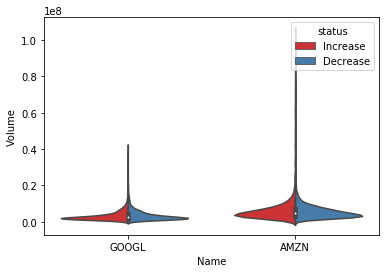

In [118]:
sns.violinplot(x=G_A['Name'], y=G_A['Volume'], data=G_A,hue='status',split=True,palette='Set1')

#### (9) Count the number of days of increase and decrease prices for google

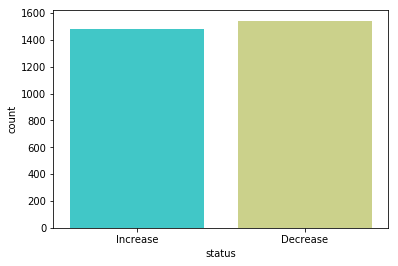

In [123]:
sns.countplot(x=r'status',data=google, palette='rainbow')

#### (10) Distribution of open price of two companies in different status using FacetGrid

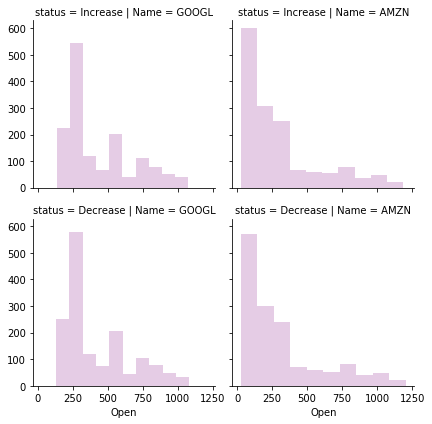

In [142]:
g = sns.FacetGrid(G_A, col="Name", row="status")
g = g.map(plt.hist, "Open", color='purple', alpha=0.2)